# Importing

In [1]:
#The imports of various libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Loading Data

In [2]:
#Load the data
data = pd.read_excel('Immunotherapy.xlsx')

# Preprocessing

In [3]:
#Preprocess the data
class Preprocess:
    
    #Constructor to initialize the Preprocess object
    def __init__(self, data):
        self.data = data
    
    #Delete duplicate rows in the dataset
    def delete(self):
        self.data.drop_duplicates(inplace=True)
    
    #Remove leading and trailing white spaces from string columns
    def deleteUselessCaracters(self):
        self.data = self.data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    #Replace multiple spaces with a single space in string columns
    def remove_multiple_spaces(self):
        self.data = self.data.apply(lambda x: x.str.replace('\s+', ' ') if x.dtype == "object" else x)
    
    #Replace double spaces with a single space in string columns
    def deleteDoubleSpace(self):
        self.data = self.data.apply(lambda x: x.str.replace('  ', ' ') if x.dtype == "object" else x)
    
    #Perform one-hot encoding for categorical variables
    def vectorisation(self):
        self.data = pd.get_dummies(self.data, drop_first=True)
    
    #Split the dataset into training and testing sets
    def NormalSplit(self, test_size=0.2):
        X = self.data.drop('Result_of_Treatment', axis=1)
        y = self.data['Result_of_Treatment']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        return X_train, X_test, y_train, y_test

#Creating an instance of the Preprocess class and applying the preprocessing steps
preprocess = Preprocess(data)
preprocess.delete()
preprocess.deleteUselessCaracters()
preprocess.remove_multiple_spaces()
preprocess.deleteDoubleSpace()
preprocess.vectorisation()
X_train, X_test, y_train, y_test = preprocess.NormalSplit()

# Data Training

In [4]:
#Training the data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Display the size of data before removing duplicated rows
print("Shape of data before deleting duplicated rows:", data.shape)

#Deleting duplicated rows
preprocess.delete()

#Display the size of data after removing duplicated rows
print("Shape of data after deleting duplicated rows:", data.shape)

Shape of data before deleting duplicated rows: (90, 8)
Shape of data after deleting duplicated rows: (90, 8)


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Data Testing

Mean Accuracy: 0.8333333333333334
Confusion Matrix:


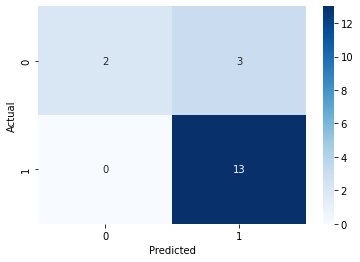

In [5]:
#Testing the data by calculating mean accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Mean Accuracy:", accuracy)

#Displaying and ploting confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Data Plot

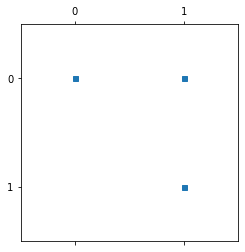

In [6]:
#Ploting the data
plt.spy(confusion, markersize=5)
plt.show()

# Make Prediction

In [7]:
# Make the prediction for 'Result_of_Treatment_positive' (1)
positive_result_of_treatment = logreg.predict([X_test.iloc[0]])  # Input the relevant features for prediction (e.g., X_test.iloc[0])

# Make the prediction for 'Result_of_Treatment_negative' (0)
negative_result_of_treatment = logreg.predict([X_test.iloc[-1]])  # Input a different relevant sample for prediction

#Result of predictions
print("Prediction for 'Result_of_Treatment_positive' (1):", positive_result_of_treatment)
print("Prediction for 'Result_of_Treatment_negative' (0):", negative_result_of_treatment)

Prediction for 'Result_of_Treatment_positive' (1): [1]
Prediction for 'Result_of_Treatment_negative' (0): [0]


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Saving Data

In [8]:
joblib.dump(logreg, 'myModel.joblib')

['myModel.joblib']